In [ ]:
# pip install missingno

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

Stack e unstack

In [2]:
casas=pd.read_csv('Dataset - Preço de Casas.csv', encoding='latin1', sep=' ', decimal=',')
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pés²           50000 non-null  int64  
 1   Quartos        50000 non-null  int64  
 2   Banheiros      50000 non-null  int64  
 3   Vizinhança     50000 non-null  object 
 4   AnoConstrução  50000 non-null  int64  
 5   Preço($)       50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [3]:
casas.head()

,Pés²,Quartos,Banheiros,Vizinhança,AnoConstrução,Preço($)
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Subúrbio,1970,306891.012076
3,2294,2,1,Urbano,1996,206786.787153
4,2130,5,2,Subúrbio,2001,272436.239065


In [4]:
casas.iloc[:,[1,2,3,5]].head()

,Quartos,Banheiros,Vizinhança,Preço($)
0,4,1,Rural,215355.283618
1,3,2,Rural,195014.221626
2,2,1,Subúrbio,306891.012076
3,2,1,Urbano,206786.787153
4,5,2,Subúrbio,272436.239065


In [5]:
stack_casas=casas.iloc[:,[1,2,3,5]].stack()
stack_casas.head(20)

0  Quartos                   4
   Banheiros                 1
   Vizinhança            Rural
   Preço($)      215355.283618
1  Quartos                   3
   Banheiros                 2
   Vizinhança            Rural
   Preço($)      195014.221626
2  Quartos                   2
   Banheiros                 1
   Vizinhança         Subúrbio
   Preço($)      306891.012076
3  Quartos                   2
   Banheiros                 1
   Vizinhança           Urbano
   Preço($)      206786.787153
4  Quartos                   5
   Banheiros                 2
   Vizinhança         Subúrbio
   Preço($)      272436.239065
dtype: object

In [6]:
stack_casas.unstack()


,Quartos,Banheiros,Vizinhança,Preço($)
0,4,1,Rural,215355.283618
1,3,2,Rural,195014.221626
2,2,1,Subúrbio,306891.012076
3,2,1,Urbano,206786.787153
4,5,2,Subúrbio,272436.239065
...,...,...,...,...
49995,5,3,Rural,100080.865895
49996,2,2,Subúrbio,374507.656727
49997,5,3,Subúrbio,384110.55559
49998,5,2,Rural,380512.685957


MultiIndex

In [13]:
tab_crostab=pd.crosstab([casas['Quartos'],casas['Banheiros']],casas['Vizinhança'])
tab_crostab#.reset_index()

Vizinhança         Rural  Subúrbio  Urbano
Quartos Banheiros                         
2       1           1373      1399    1455
        2           1429      1373    1381
        3           1316      1365    1345
3       1           1394      1436    1435
        2           1390      1426    1365
        3           1389      1444    1382
4       1           1416      1356    1344
        2           1382      1432    1367
        3           1402      1372    1364
5       1           1423      1357    1367
        2           1410      1383    1381
        3           1352      1378    1417

In [14]:
tab_crostab.stack().head(18)

Quartos  Banheiros  Vizinhança
2        1          Rural         1373
                    Subúrbio      1399
                    Urbano        1455
         2          Rural         1429
                    Subúrbio      1373
                    Urbano        1381
         3          Rural         1316
                    Subúrbio      1365
                    Urbano        1345
3        1          Rural         1394
                    Subúrbio      1436
                    Urbano        1435
         2          Rural         1390
                    Subúrbio      1426
                    Urbano        1365
         3          Rural         1389
                    Subúrbio      1444
                    Urbano        1382
dtype: int64

Explode

In [32]:
ps=pd.read_csv('Dataset - Poluição atmosférica.csv', sep=';')
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        1106 non-null   object 
 1   País        1106 non-null   object 
 2   Status      1106 non-null   object 
 3   IQA         1106 non-null   int64  
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 43.3+ KB


In [33]:
ps.dropna(axis=1, how='all', inplace=True)
ps

,Data,País,Status,IQA
0,12/01/2023,Albania,Bom,9
1,12/01/2023,Algeria,Moderado,65
2,12/01/2023,Andorra,Bom,9
3,12/01/2023,Angola,Bom,45
4,12/01/2023,Argentina,Bom,19
...,...,...,...,...
1101,11/05/2023,Uzbekistan,Moderado,57
1102,11/05/2023,Vatican,Bom,50
1103,11/05/2023,Venezuela,Bom,17
1104,11/05/2023,Vietnam,Modderado,94


In [34]:
ps['Data_valor']=ps.Data.str.split('/')
ps

,Data,País,Status,IQA,Data_valor
0,12/01/2023,Albania,Bom,9,"[12, 01, 2023]"
1,12/01/2023,Algeria,Moderado,65,"[12, 01, 2023]"
2,12/01/2023,Andorra,Bom,9,"[12, 01, 2023]"
3,12/01/2023,Angola,Bom,45,"[12, 01, 2023]"
4,12/01/2023,Argentina,Bom,19,"[12, 01, 2023]"
...,...,...,...,...,...
1101,11/05/2023,Uzbekistan,Moderado,57,"[11, 05, 2023]"
1102,11/05/2023,Vatican,Bom,50,"[11, 05, 2023]"
1103,11/05/2023,Venezuela,Bom,17,"[11, 05, 2023]"
1104,11/05/2023,Vietnam,Modderado,94,"[11, 05, 2023]"


In [37]:
ps_ajsutado=ps.explode('Data_valor')
ps_ajsutado.head(9)

,Data,País,Status,IQA,Data_valor
0,12/01/2023,Albania,Bom,9,12
0,12/01/2023,Albania,Bom,9,01
0,12/01/2023,Albania,Bom,9,2023
1,12/01/2023,Algeria,Moderado,65,12
1,12/01/2023,Algeria,Moderado,65,01
1,12/01/2023,Algeria,Moderado,65,2023
2,12/01/2023,Andorra,Bom,9,12
2,12/01/2023,Andorra,Bom,9,01
2,12/01/2023,Andorra,Bom,9,2023


In [38]:
ps_ajsutado.index.value_counts()

0       3
735     3
741     3
740     3
739     3
       ..
374     3
375     3
376     3
377     3
1105    3
Name: count, Length: 1106, dtype: int64

In [40]:
ps_ajsutado['Data_tipo']=['dia','mes','ano']*len(ps)
ps_ajsutado.tail(9)

,Data,País,Status,IQA,Data_valor,Data_tipo
1103,11/05/2023,Venezuela,Bom,17,11,dia
1103,11/05/2023,Venezuela,Bom,17,05,mes
1103,11/05/2023,Venezuela,Bom,17,2023,ano
1104,11/05/2023,Vietnam,Modderado,94,11,dia
1104,11/05/2023,Vietnam,Modderado,94,05,mes
1104,11/05/2023,Vietnam,Modderado,94,2023,ano
1105,11/05/2023,Zambia,Modderado,67,11,dia
1105,11/05/2023,Zambia,Modderado,67,05,mes
1105,11/05/2023,Zambia,Modderado,67,2023,ano


In [47]:
ps_ajsutado[(ps_ajsutado.Data_tipo=='mes')].Data_valor.value_counts()

Data_valor
04    558
05    275
03    138
01    135
Name: count, dtype: int64

In [50]:
ps_ajsutado[(ps_ajsutado.Data_tipo=='mes')&(ps_ajsutado.Data_valor=='04')].IQA.mean()

75.30286738351255

Pivot e pivot table

In [54]:
#pivot
df=pd.DataFrame()
df['Grupo']=['A']*2+['B']*2
df['Categoria']=['X','Y']*2
df['Ano']=[2019,2020]*2
df['Valor']=range(10,40+1,10)
df

,Grupo,Categoria,Ano,Valor
0,A,X,2019,10
1,A,Y,2020,20
2,B,X,2019,30
3,B,Y,2020,40


In [55]:
df.pivot(index='Grupo',columns='Ano', values='Valor')

Ano,2019,2020
Grupo,,
A,10,20
B,30,40


In [56]:
#pivot table
casas.head()

,Pés²,Quartos,Banheiros,Vizinhança,AnoConstrução,Preço($)
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Subúrbio,1970,306891.012076
3,2294,2,1,Urbano,1996,206786.787153
4,2130,5,2,Subúrbio,2001,272436.239065


In [57]:
pd.pivot_table(casas, index='Vizinhança', columns='Banheiros', values='Preço($)', aggfunc='max').round(2)

Banheiros,1,2,3
Vizinhança,,,
Rural,456959.80,492195.26,452870.62
Subúrbio,482577.16,447379.23,457902.68
Urbano,449584.86,476671.73,470989.68


Dtype e astype

In [58]:
casas.dtypes

Pés²               int64
Quartos            int64
Banheiros          int64
Vizinhança        object
AnoConstrução      int64
Preço($)         float64
dtype: object

In [59]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pés²           50000 non-null  int64  
 1   Quartos        50000 non-null  int64  
 2   Banheiros      50000 non-null  int64  
 3   Vizinhança     50000 non-null  object 
 4   AnoConstrução  50000 non-null  int64  
 5   Preço($)       50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [61]:
casas.Quartos=casas.Quartos.astype(str)
casas.dtypes

Pés²               int64
Quartos           object
Banheiros          int64
Vizinhança        object
AnoConstrução      int64
Preço($)         float64
dtype: object

Missing

In [62]:
pokemons=pd.read_csv('Dataset - Pokemon.csv', index_col=0)
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1027
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abilities_number  1028 non-null   int64  
 1   ability_1         1024 non-null   object 
 2   ability_2         512 non-null    object 
 3   ability_hidden    810 non-null    object 
 4   attack            1027 non-null   float64
 5   base_experience   923 non-null    float64
 6   base_friendship   923 non-null    float64
 7   catch_rate        923 non-null    float64
 8   defense           1027 non-null   float64
 9   egg_cycles        1026 non-null   float64
 10  egg_type_1        1024 non-null   object 
 11  egg_type_2        282 non-null    object 
 12  egg_type_number   1028 non-null   int64  
 13  generation        1028 non-null   int64  
 14  growth_rate       1026 non-null   object 
 15  height_m          1027 non-null   float64
 16  hp                1027 non-null   float64
 17  

In [63]:
pokemons.head()

,abilities_number,ability_1,ability_2,ability_hidden,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,...,pokedex_number,sp_attack,sp_defense,species,speed,total_points,type_1,type_2,type_number,weight_kg
0,2,Overgrow,NaN,Chlorophyll,49.0,64.0,70.0,45.0,49.0,20.0,...,1,65.0,65.0,Seed Pokémon,45.0,318.0,Grass,Poison,2,6.9
1,2,Overgrow,NaN,Chlorophyll,62.0,142.0,70.0,45.0,63.0,20.0,...,2,80.0,80.0,Seed Pokémon,60.0,405.0,Grass,Poison,2,13.0
2,2,Overgrow,NaN,Chlorophyll,82.0,236.0,70.0,45.0,83.0,20.0,...,3,100.0,100.0,Seed Pokémon,80.0,525.0,Grass,Poison,2,100.0
3,1,Thick Fat,NaN,NaN,100.0,281.0,70.0,45.0,123.0,20.0,...,3,122.0,120.0,Seed Pokémon,80.0,625.0,Grass,Poison,2,155.5
4,2,Blaze,NaN,Solar Power,52.0,62.0,70.0,45.0,43.0,20.0,...,4,60.0,50.0,Lizard Pokémon,65.0,309.0,Fire,NaN,1,8.5


In [67]:
pokemons[~pokemons.isna()]

,abilities_number,ability_1,ability_2,ability_hidden,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,...,pokedex_number,sp_attack,sp_defense,species,speed,total_points,type_1,type_2,type_number,weight_kg
0,2,Overgrow,NaN,Chlorophyll,49.0,64.0,70.0,45.0,49.0,20.0,...,1,65.0,65.0,Seed Pokémon,45.0,318.0,Grass,Poison,2,6.9
1,2,Overgrow,NaN,Chlorophyll,62.0,142.0,70.0,45.0,63.0,20.0,...,2,80.0,80.0,Seed Pokémon,60.0,405.0,Grass,Poison,2,13.0
2,2,Overgrow,NaN,Chlorophyll,82.0,236.0,70.0,45.0,83.0,20.0,...,3,100.0,100.0,Seed Pokémon,80.0,525.0,Grass,Poison,2,100.0
3,1,Thick Fat,NaN,NaN,100.0,281.0,70.0,45.0,123.0,20.0,...,3,122.0,120.0,Seed Pokémon,80.0,625.0,Grass,Poison,2,155.5
4,2,Blaze,NaN,Solar Power,52.0,62.0,70.0,45.0,43.0,20.0,...,4,60.0,50.0,Lizard Pokémon,65.0,309.0,Fire,NaN,1,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1,Intrepid Sword,NaN,NaN,130.0,NaN,NaN,NaN,115.0,120.0,...,888,80.0,115.0,Warrior Pokémon,138.0,670.0,Fairy,NaN,1,110.0
1024,1,Dauntless Shield,NaN,NaN,130.0,NaN,NaN,NaN,145.0,120.0,...,889,80.0,145.0,Warrior Pokémon,128.0,720.0,Fighting,Steel,2,785.0
1025,1,Dauntless Shield,NaN,NaN,130.0,NaN,NaN,NaN,115.0,120.0,...,889,80.0,115.0,Warrior Pokémon,138.0,670.0,Fighting,NaN,1,210.0
1026,1,Pressure,NaN,NaN,85.0,NaN,NaN,NaN,95.0,120.0,...,890,145.0,95.0,Gigantic Pokémon,130.0,690.0,Poison,Dragon,2,950.0


In [68]:
pokemons[pokemons.ability_1.isna()]

,abilities_number,ability_1,ability_2,ability_hidden,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,...,pokedex_number,sp_attack,sp_defense,species,speed,total_points,type_1,type_2,type_number,weight_kg
33,1,NaN,NaN,Lightning Rod,80.0,112.0,70.0,190.0,50.0,10.0,...,25,75.0,60.0,Mouse Pokémon,120.0,430.0,Electric,NaN,1,6.0
170,1,NaN,NaN,Anticipation,75.0,65.0,70.0,45.0,70.0,35.0,...,133,65.0,85.0,Evolution Pokémon,75.0,435.0,Normal,NaN,1,6.5
240,1,NaN,NaN,Regenerator,NaN,NaN,NaN,NaN,NaN,NaN,...,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1027,0,NaN,NaN,NaN,115.0,NaN,NaN,NaN,250.0,120.0,...,890,125.0,250.0,Gigantic Pokémon,130.0,1125.0,Poison,Dragon,2,NaN


In [69]:
pokemons[pokemons.ability_1.isnull()]

,abilities_number,ability_1,ability_2,ability_hidden,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,...,pokedex_number,sp_attack,sp_defense,species,speed,total_points,type_1,type_2,type_number,weight_kg
33,1,NaN,NaN,Lightning Rod,80.0,112.0,70.0,190.0,50.0,10.0,...,25,75.0,60.0,Mouse Pokémon,120.0,430.0,Electric,NaN,1,6.0
170,1,NaN,NaN,Anticipation,75.0,65.0,70.0,45.0,70.0,35.0,...,133,65.0,85.0,Evolution Pokémon,75.0,435.0,Normal,NaN,1,6.5
240,1,NaN,NaN,Regenerator,NaN,NaN,NaN,NaN,NaN,NaN,...,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1027,0,NaN,NaN,NaN,115.0,NaN,NaN,NaN,250.0,120.0,...,890,125.0,250.0,Gigantic Pokémon,130.0,1125.0,Poison,Dragon,2,NaN


In [70]:
# dropna (relembrando)
pokemons.dropna()

,abilities_number,ability_1,ability_2,ability_hidden,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,...,pokedex_number,sp_attack,sp_defense,species,speed,total_points,type_1,type_2,type_number,weight_kg
45,3,Poison Point,Rivalry,Sheer Force,102.0,227.0,70.0,45.0,77.0,20.0,...,34,85.0,75.0,Drill Pokémon,85.0,505.0,Poison,Ground,2,62.0
59,3,Effect Spore,Dry Skin,Damp,70.0,57.0,70.0,190.0,55.0,20.0,...,46,45.0,55.0,Mushroom Pokémon,25.0,285.0,Bug,Grass,2,5.4
60,3,Effect Spore,Dry Skin,Damp,95.0,142.0,70.0,75.0,80.0,20.0,...,47,60.0,80.0,Mushroom Pokémon,30.0,405.0,Bug,Grass,2,29.5
103,3,Oblivious,Own Tempo,Regenerator,65.0,63.0,70.0,190.0,65.0,20.0,...,79,40.0,40.0,Dopey Pokémon,15.0,315.0,Water,Psychic,2,36.0
104,3,Oblivious,Own Tempo,Regenerator,75.0,172.0,70.0,75.0,110.0,20.0,...,80,100.0,80.0,Hermit Crab Pokémon,30.0,490.0,Water,Psychic,2,78.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,3,Frisk,Infiltrator,Telepathy,70.0,187.0,70.0,45.0,80.0,20.0,...,715,97.0,80.0,Sound Wave Pokémon,123.0,535.0,Flying,Dragon,2,85.0
864,3,Honey Gather,Shield Dust,Sweet Veil,45.0,61.0,70.0,190.0,40.0,20.0,...,742,55.0,40.0,Bee Fly Pokémon,84.0,304.0,Bug,Fairy,2,0.2
865,3,Honey Gather,Shield Dust,Sweet Veil,55.0,162.0,70.0,75.0,60.0,20.0,...,743,95.0,70.0,Bee Fly Pokémon,124.0,464.0,Bug,Fairy,2,0.5
904,3,Iron Barbs,Lightning Rod,Sturdy,98.0,152.0,70.0,180.0,63.0,10.0,...,777,40.0,73.0,Roly-Poly Pokémon,96.0,435.0,Electric,Steel,2,3.3


In [71]:
# fillna
pokemons.describe().round(0)

,abilities_number,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,egg_type_number,generation,height_m,...,is_mythical,is_sub_legendary,percentage_male,pokedex_number,sp_attack,sp_defense,speed,total_points,type_number,weight_kg
count,1028.0,1027.0,923.0,923.0,923.0,1027.0,1026.0,1028.0,1028.0,1027.0,...,1028.0,1028.0,791.0,1028.0,1027.0,1027.0,1027.0,1027.0,1028.0,1026.0
mean,2.0,80.0,154.0,64.0,93.0,75.0,30.0,1.0,4.0,1.0,...,0.0,0.0,55.0,438.0,73.0,72.0,69.0,438.0,2.0,70.0
std,1.0,32.0,79.0,21.0,75.0,31.0,29.0,0.0,2.0,3.0,...,0.0,0.0,20.0,259.0,33.0,28.0,30.0,122.0,1.0,129.0
min,0.0,5.0,36.0,0.0,3.0,5.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,10.0,20.0,5.0,175.0,0.0,0.0
25%,2.0,55.0,67.0,70.0,45.0,50.0,20.0,1.0,2.0,1.0,...,0.0,0.0,50.0,214.0,50.0,50.0,45.0,330.0,1.0,9.0
50%,2.0,76.0,159.0,70.0,60.0,70.0,20.0,1.0,4.0,1.0,...,0.0,0.0,50.0,434.0,65.0,70.0,65.0,455.0,2.0,29.0
75%,3.0,100.0,202.0,70.0,127.0,90.0,25.0,2.0,6.0,2.0,...,0.0,0.0,50.0,663.0,95.0,90.0,90.0,510.0,2.0,70.0
max,3.0,190.0,608.0,140.0,255.0,250.0,120.0,2.0,8.0,100.0,...,1.0,1.0,100.0,890.0,194.0,250.0,180.0,1125.0,2.0,1000.0


In [75]:
pokemons_2=pokemons.copy()
pokemons_2.base_experience.fillna(0, inplace=True)
pokemons_2.describe().round(0)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7280\1200016605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemons_2.base_experience.fillna(0, inplace=True)


,abilities_number,attack,base_experience,base_friendship,catch_rate,defense,egg_cycles,egg_type_number,generation,height_m,...,is_mythical,is_sub_legendary,percentage_male,pokedex_number,sp_attack,sp_defense,speed,total_points,type_number,weight_kg
count,1028.0,1027.0,1028.0,923.0,923.0,1027.0,1026.0,1028.0,1028.0,1027.0,...,1028.0,1028.0,791.0,1028.0,1027.0,1027.0,1027.0,1027.0,1028.0,1026.0
mean,2.0,80.0,138.0,64.0,93.0,75.0,30.0,1.0,4.0,1.0,...,0.0,0.0,55.0,438.0,73.0,72.0,69.0,438.0,2.0,70.0
std,1.0,32.0,88.0,21.0,75.0,31.0,29.0,0.0,2.0,3.0,...,0.0,0.0,20.0,259.0,33.0,28.0,30.0,122.0,1.0,129.0
min,0.0,5.0,0.0,0.0,3.0,5.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,10.0,20.0,5.0,175.0,0.0,0.0
25%,2.0,55.0,62.0,70.0,45.0,50.0,20.0,1.0,2.0,1.0,...,0.0,0.0,50.0,214.0,50.0,50.0,45.0,330.0,1.0,9.0
50%,2.0,76.0,148.0,70.0,60.0,70.0,20.0,1.0,4.0,1.0,...,0.0,0.0,50.0,434.0,65.0,70.0,65.0,455.0,2.0,29.0
75%,3.0,100.0,184.0,70.0,127.0,90.0,25.0,2.0,6.0,2.0,...,0.0,0.0,50.0,663.0,95.0,90.0,90.0,510.0,2.0,70.0
max,3.0,190.0,608.0,140.0,255.0,250.0,120.0,2.0,8.0,100.0,...,1.0,1.0,100.0,890.0,194.0,250.0,180.0,1125.0,2.0,1000.0


In [ ]:
pokemons_2.fillna({'base_experience':0})
pokemons_2.describe().round(0)

<Axes: >

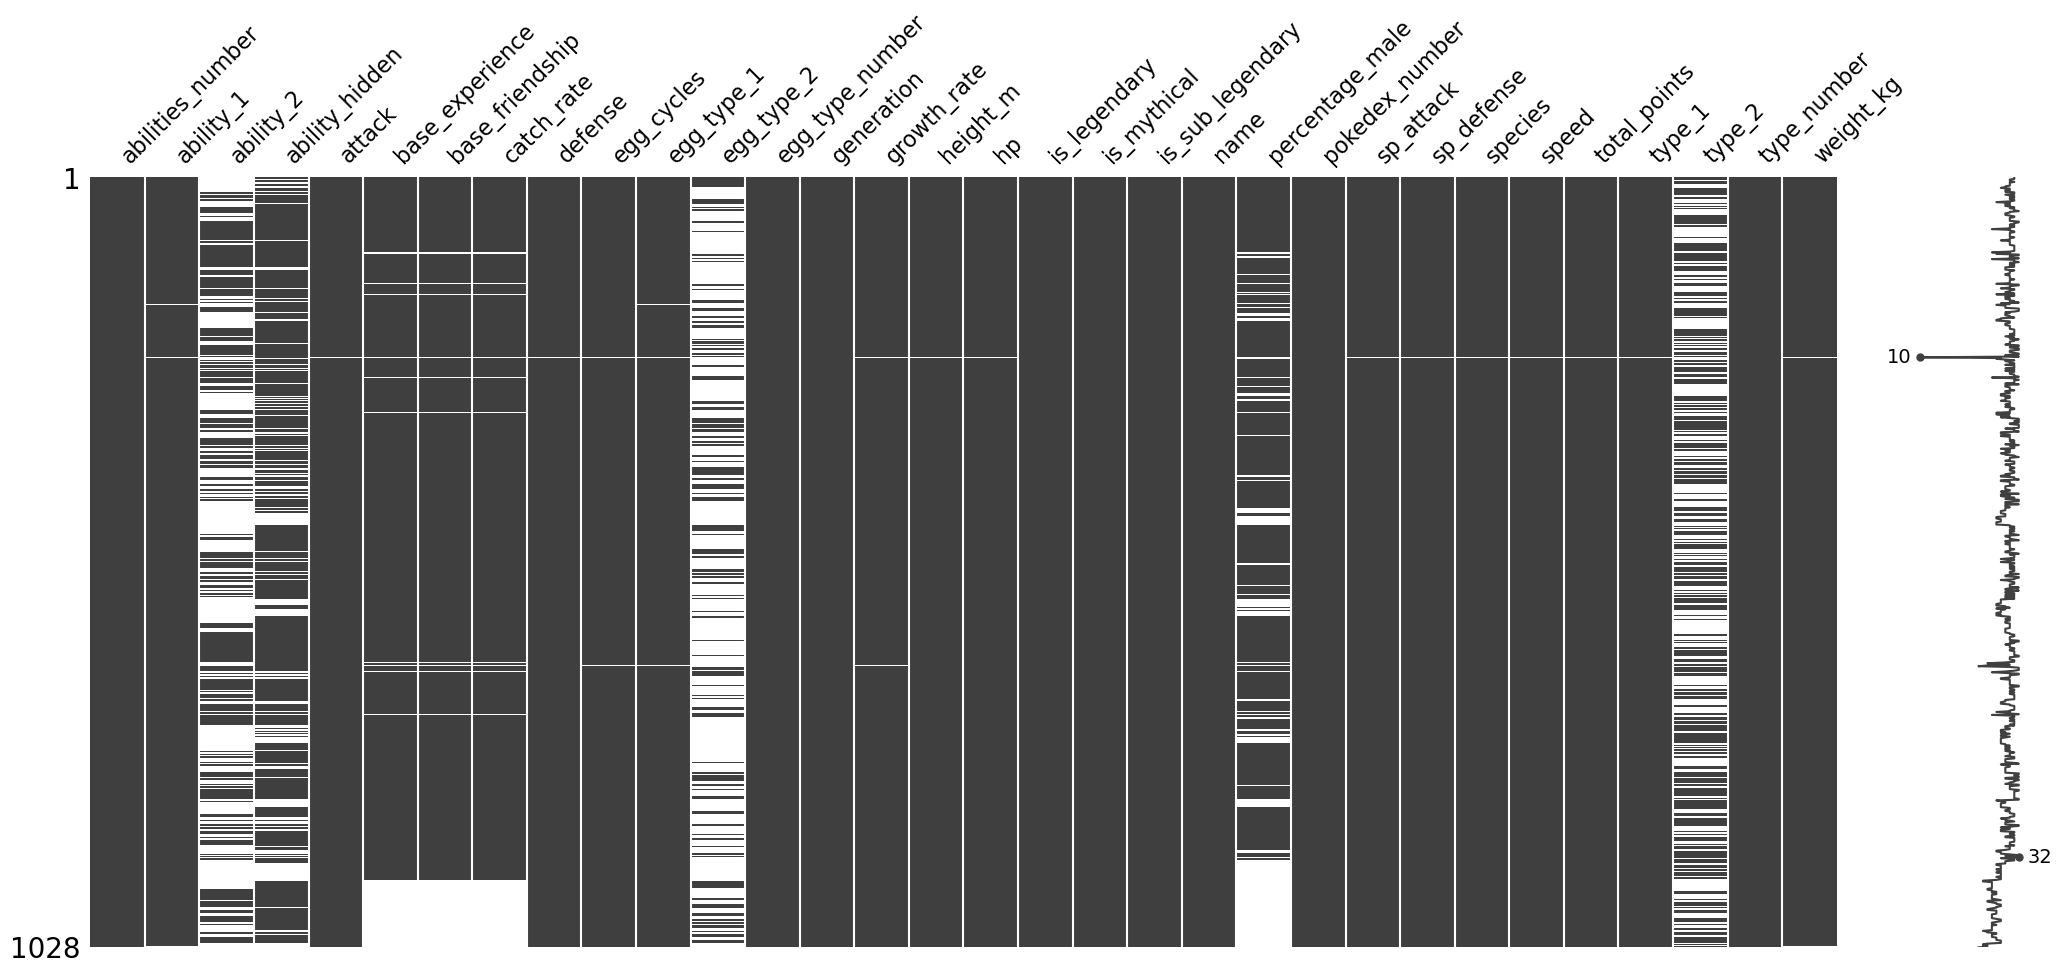

In [76]:
#gráfico de missing
msno.matrix(pokemons)